In [1]:
from src.datalake import Datalake
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import pyarrow.compute as pc

In [2]:
data = Datalake('../../data')

In [3]:
states = data.query_states()

In [4]:
states.sample(5)


for i in range(data.years[0], data.years[1+1]):
    query = (pc.field('year') == i)
    weather = data.query_ghcnd(query)
    # HEX HERE
    hexed_weather.to_parquet()

,name,code,geometry
0,New Mexico,NM,"MULTIPOLYGON (((-109.05017 31.48, -109.04984 3..."
23,South Carolina,SC,"MULTIPOLYGON (((-79.50795 33.02008, -79.50713 ..."
15,Indiana,IN,"MULTIPOLYGON (((-88.09776 37.90403, -88.09448 ..."
2,California,CA,"MULTIPOLYGON (((-118.60441 33.47855, -118.5987..."
44,North Carolina,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."


In [5]:
(states[states['name'] == 'California']['code'])

2    CA
Name: code, dtype: object

In [6]:
query = (pc.field('state') == 'CA')

weather = data.query_ghcnd(query)

In [7]:
import h3pandas

In [8]:
resolution = 10
h3_weather = weather.h3.geo_to_h3(resolution)

In [9]:
h3_weather

,station_id,year,month,day,prcp,snow,snwd,tmax,tmin,awnd,elevation,state,geometry
h3_10,,,,,,,,,,,,,
8a2802b99ceffff,US1CAHM0047,2000,9,22,0.0,0.0,NaN,NaN,NaN,NaN,745.5,CA,POINT (-123.9245 40.6578)
8a291a6dd14ffff,US1CAMT0043,2000,7,15,5.0,NaN,NaN,NaN,NaN,NaN,41.8,CA,POINT (-121.9409 36.6027)
8a28321758d7fff,US1CASA0031,2000,1,1,0.0,0.0,NaN,NaN,NaN,NaN,102.1,CA,POINT (-121.1556 38.6754)
8a28321758d7fff,US1CASA0031,2000,1,2,0.0,0.0,NaN,NaN,NaN,NaN,102.1,CA,POINT (-121.1556 38.6754)
8a28321758d7fff,US1CASA0031,2000,1,3,0.0,0.0,NaN,NaN,NaN,NaN,102.1,CA,POINT (-121.1556 38.6754)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8a2812a74b47fff,USW00094299,2025,3,8,0.0,NaN,NaN,156.0,-83.0,NaN,1335.9,CA,POINT (-120.5614 41.4836)
8a2812a74b47fff,USW00094299,2025,3,9,0.0,NaN,NaN,150.0,-56.0,NaN,1335.9,CA,POINT (-120.5614 41.4836)
8a2812a74b47fff,USW00094299,2025,3,10,0.0,NaN,NaN,144.0,-56.0,NaN,1335.9,CA,POINT (-120.5614 41.4836)


<Axes: >

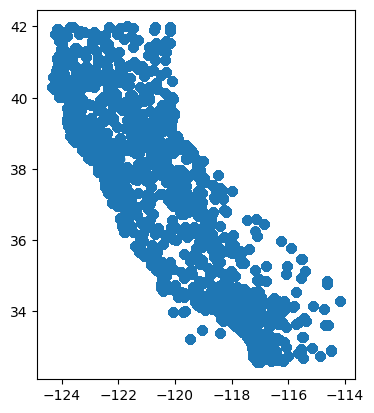

In [10]:
h3_weather.plot()